The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [94]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
df = pd.read_csv('data/nobel.csv')
df.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


We calculate the most common gender and birth country.

In [95]:
top_gender = df['sex'].mode()[0] #mode of sex column, print the first

print(f'The most commonly gender is {top_gender}')

top_country = df['birth_country'].mode()[0] #mode of birth_country column, print the first

print(f'while the most commonly birth country is {top_country}')

The most commonly gender is Male
while the most commonly birth country is United States of America


Identify the decade with the highest ratio of US-born winners. 
We can do another column for calculate the decade.

The highest ratio (per decade) of United States of America is: 2000


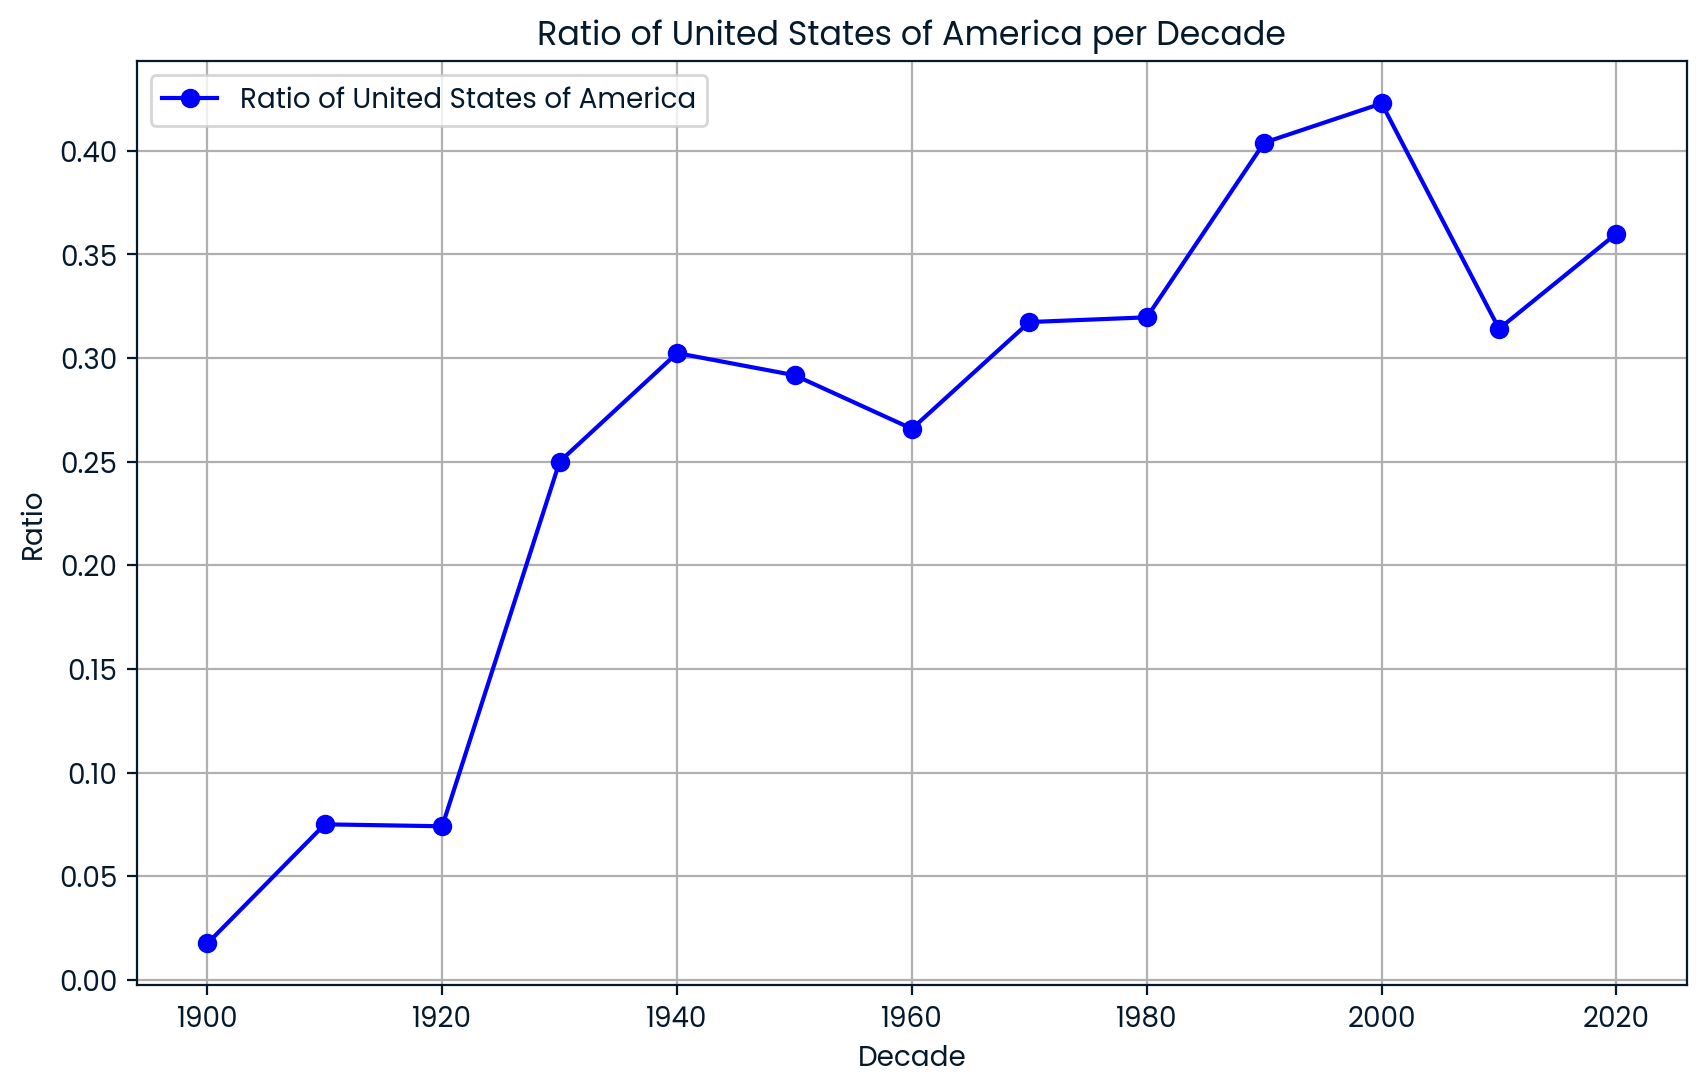

In [96]:
country = 'United States of America'

df['decade'] = (df['year'] // 10) * 10 # Obtain the decade, e.g. (1995//10)*10=199*10=1990

df_usa = df[df['birth_country'] == country].groupby('decade').size() # Filtered for USA
df_dec = df.groupby('decade').size() 

ratio = df_usa / df_dec # Calculate the radio 

max_decade_usa = ratio.idxmax() # Obtain the most common

print(f'The highest ratio (per decade) of {country} is: {max_decade_usa}')

plt.figure(figsize=(10, 6))
plt.plot(ratio.index, ratio.values, marker='o', linestyle='-', color='b', label=f'Ratio of {country}')
plt.title(f'Ratio of {country} per Decade')
plt.xlabel('Decade')
plt.ylabel('Ratio')
plt.grid(True)
plt.legend()
plt.show()

Now, we'llmodify the code from the previous tasks to create a DataFrame for the proportion of female winners, we'll create a dictionary called with the year and category pair with the most female winners.

The highest ratio (per decade) of 2020 is: Literature


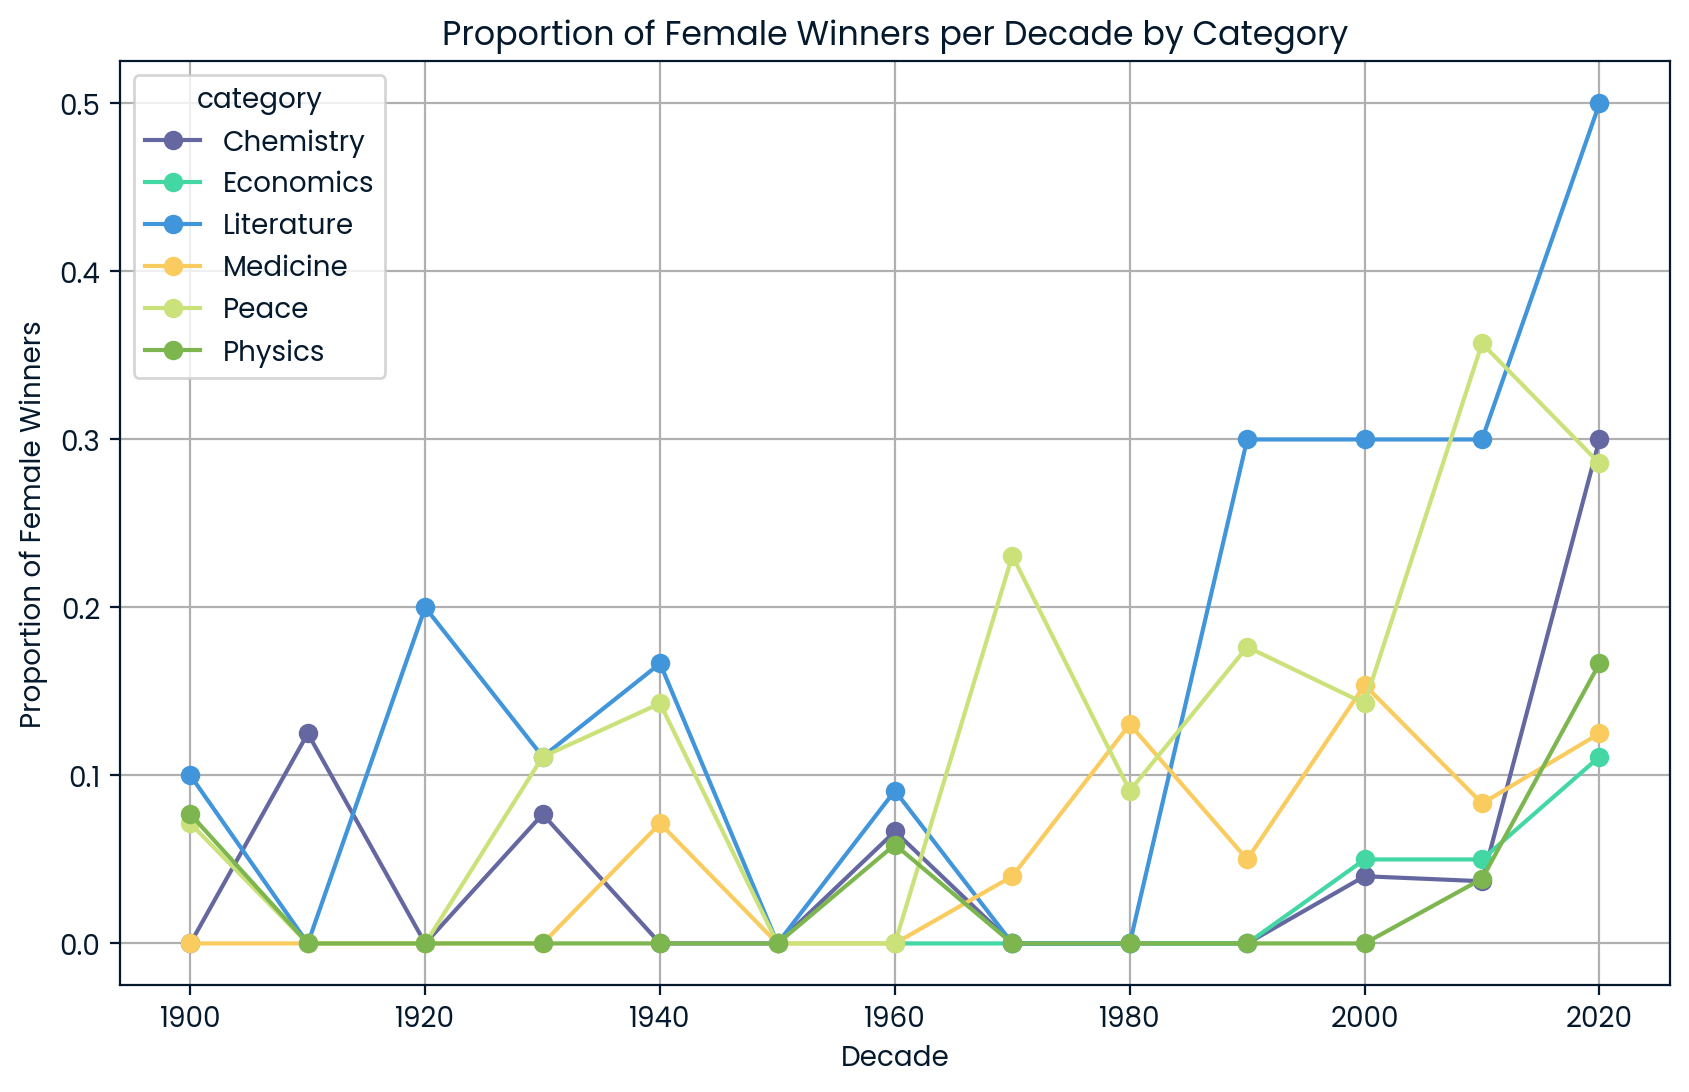

In [97]:
df['decade'] = (df['year'] // 10) * 10 # Obtain the decade, e.g. (1995//10)*10=199*10=1990

df_fem = df[df['sex'] == 'Female'].groupby(['decade','category']).size() # Filtered for female
df_dec_cat = df.groupby(['decade','category']).size()  # Total winners in each category per decade

df_fem = df_fem.reindex(df_dec_cat.index, fill_value=0) 
df_proportion = df_fem / df_dec_cat 

most_frequent_decade = df_proportion.idxmax()  # Get the index (decade, category) of the maximum value

max_female_dict = {most_frequent_decade[0]: most_frequent_decade[1]} # Create a dictionary
max_female_dict
print(f"The highest ratio (per decade) of {most_frequent_decade[0]} is: {most_frequent_decade[1]}")

df_proportion_unstacked = df_proportion.unstack() 

df_proportion_unstacked.plot(figsize=(10, 6), marker='o', title='Proportion of Female Winners per Decade by Category')
plt.xlabel('Decade')
plt.ylabel('Proportion of Female Winners')
plt.grid(True)
plt.show()

We're going to find the first woman to win a Nobel Price

In [98]:
df_fem = df[df['sex'] == 'Female']

earliest_year = df_fem['year'].min()  # Get the minimum year
first_woman = df_fem[df_fem['year'] == earliest_year]  # Get the row for the earliest year

first_woman_name = first_woman['full_name'].values[0]  # Save the name
first_woman_category = first_woman['category'].values[0]  # Save the category

print(f'The earliest year with a female winner is: {earliest_year} in category: {first_woman_category} with the name: {first_woman_name}')

The earliest year with a female winner is: 1903 in category: Physics with the name: Marie Curie, née Sklodowska


Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [99]:
winner_counts = df['full_name'].value_counts()  # Count occurrences of each name

# Step 2: Filter for winners who have won two or more times
repeat_list = winner_counts[winner_counts >= 2].index.tolist()  # Get names of repeat winners

# Print the result
print(f'Repeat winners: {repeat_list}')

Repeat winners: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
